
# Diversity at the Met
By Megan Englert

### Background
Founded in 1870, the Metropolitan Museum of Art is now one of the most famous art galleries in the world. With works ranging 5,000 years according to their website, their collection captures much of recorded history through its artwork ("About the Met"). Visitors come into the Met and experience history through the eyes of those who were present. However, we must question how much power the Met (and other galleries) have in showing history the way they want to show it.

While art invaluably captures perspectives from the past, we must ensure that museums reflect a range of perspectives, rather than the white, male perspective prevalent in art history. Much of art historical rhetoric today is about changing the canon. Many people's standard of "good art" is art created by white, European men. It is rare to discuss female or non-European artists working prior to the 19th century, and while European art is considered by time period, non-European art is often clumped together into one section, such as "African Art," while European art is divided by region and time period. We must consider how the field of art values the voices of those other than males of European descent.

Furthermore, we must consider the rhetoric we use to discuss art. The Met categorizes creators into categories such as artist, maker, manufacturer, etc. While an "artist" would create "art," an art historian would likely say that a "maker" creates "objects," including coins, pottery, and other common decorated household items. How is this rhetoric applied to different cultures? What about different genders? Does Europe have more artwork while other continents have more objects? In other words, do we hold what is produced in different cultures as highly as we hold European works?

### Research Questions
1. Are women and men represented equally in the museum's collection?
2. Is art from different continents represented equally? Do we consider creators from these other continents "artists" at the same rate as we do creators in the US and Europe?
3. Does more recent art (20th century and beyond) better reflect diversity than older art, since older art by minorities may not have been as well preserved or documented?

### Justification
Protests about museum diversity has been prevalent since the mid-20th century. A [work of art from 1989](https://www.tate.org.uk/art/artworks/guerrilla-girls-do-women-have-to-be-naked-to-get-into-the-met-museum-p78793), created by a group called the Guerilla Girls, questions "Do women have to be naked to get into the Met. Museum?", citing that, at the time, less than 5% of the Modern art collection was female artists, while 85% of nude depictions in the museum were of women. This analysis will hopefully show some improvement from this figure. 

In terms of nationalities, universities are actively working to diversify the canon. In January 2020, Yale announced its plans to change its two art history survey course curriculum to classes that focused on art outside of Europe and America, which faced much backlash (Stiernberg). Similarly, UD is changing its Art History distribution requirements to four out of Pre-1400, 1400-1700, 1700-1900, 1900 to Modern, and "African, Asian, Islamic, Native American or Latin American art," theoretically allowing a student to dodge Eurocentric art entirely to a new system requiring both chronological and nationality distribution in August of this year. While it's great that universities are working to diversify art history, are museums with already-existing collections doing the same? Monica Gu explores in "Why don't we appreciate non-Western art?" the role that art history education has in appreciation of these works, and hopefully more diverse programs foster a higher appreciation, giving museums even more of a reason to host diverse collections (Gu).

Unfortunately, we must accept that the long history of art history has left us with many Eurocentric, male-created pieces of art. Since our culture did not value the voices of minorities, we are left with few pieces created by them and even less information on those pieces. Hopefully, by the 20th century, when women and cultural minorities were more recognized within the art world, the Met took the opportunity to diversify their collection. Works by women and minorities are more available to them than ever - if the numbers have not improved, there is no excuse for it.

### Datasets
[The Metropolitan Museum of Art Open Access CSV](https://github.com/metmuseum/openaccess)

[lukes's ISO 3166 Countries with Regional Codes](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv)

### Dataset Explanation
The Met dataset was compiled by the Met itself, with each line representing a work in its collection. Along with information on each of the works, there is information about the artist, including their gender, culture, and nationality. Some data is left blank because it is unknown, which is an issue for many older pieces.

The dataset for countries was used to get the region for each country in order to sort them into continents.


### Ethical Concerns
**Conclusions about the Met**: If I happen to find that genders are disproportionately represented in the museum, the Met is not automatically sexist. If cultures are disproportionately represented, the Met is not automatically catering to white suprematists. Unfortunately, art history has a long history of its own, and biases from history have long influenced what is considered valuable or worth keeping. Even if there were female artists during the Renaissance, history did not care enough about them to write about them or cherish their works the way we would cherish a Titian. If you are not an art history buff, you're likely looking forward to seeing a bunch of male artists' works because those male artists are what are most commonly taught as art history canon.

**De-valuing works of art**: Even if an artwork was created by a white male, it still has value and importance to the story of art. And because of the way art has long been a club of white men, many of the post important works in the world are arguably created by white men. This report is not meant to suggest that we should throw away current works of art until we have a 50-50 split between men and women and proportional nationalities; instead, it is just to point out the disparities that the canon has created.

# Preparing Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("MetObjects.csv")
df.head()

def parse_gender(gender: str) -> str:
    if gender == '|':
        return "male"
    elif gender == 'Female':
        return "female"
    all_pipe = True
    all_female = True
    for c in str(gender):
        if c != "|":
            all_pipe = False
    if gender.count("Female") == gender.count("|") + 1:
        return 'females'
    if all_pipe:
        return 'males'
    return "mixed"

genders = df[df['Artist Gender'].notnull()]
genders["Gender"] = genders.loc[:,"Artist Gender"].apply(parse_gender)

<ipython-input-4-d1cc5083cb0b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genders["Gender"] = genders.loc[:,"Artist Gender"].apply(parse_gender)


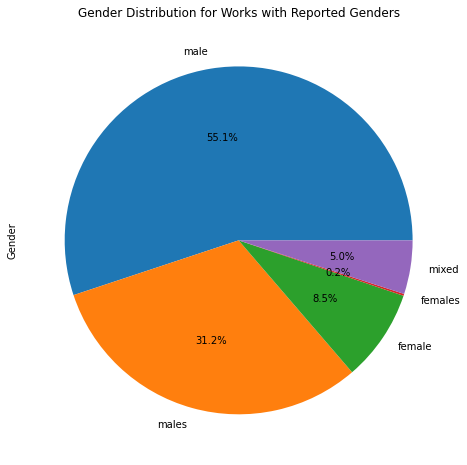

In [38]:
genders_data = genders['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
labels = ['male','males','female','females','mixed']
ax.set_title('Gender Distribution for Works with Reported Genders')
#reindex(labels) sorts the index of the value counts according to the list labels
ax = genders['Gender'].value_counts(normalize=True).reindex(labels).plot.pie(autopct='%.1f%%')
plt.show()


As can be seen in the pie chart, the Met's collection is dominated by male artists. Over 80% of their total collection with reported genders was created by a single male or group of males. This disparity may be caused by centuries of ignoring female artists in the art historical canon, rather than the Met's choices directly. For example, if only male artists were documented in the Medieval period, all Medieval art is either male or unknown. These numbers will hopefully improve as we approach the modern period, when female artists were fighting for their rights to representation.

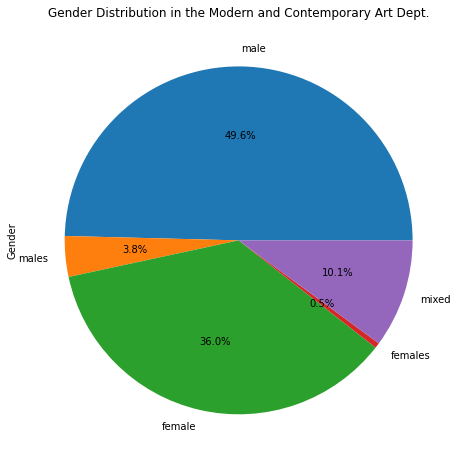

In [37]:
genders_modern = genders[(genders["Department"] == "Modern and Contemporary Art")]
fig, ax = plt.subplots(figsize=(8, 8))
labels = ['male','males','female','females','mixed']
ax.set_title('Gender Distribution in the Modern and Contemporary Art Dept.')
#reindex(labels) sorts the index of the value counts according to the list labels
ax = genders_modern['Gender'].value_counts(normalize=True).reindex(labels).plot.pie(autopct='%.1f%%')
plt.show()

As we can see, the females are much more greatly represented in the Modern Art department, going from 8.5% to 36%. Now, we will compare the Modern Art department before vs. after the 1989 Guerilla Girls piece.

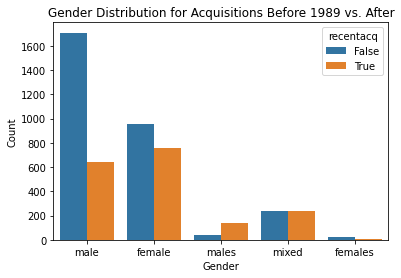

In [32]:
def parse_date(date)-> int:
    if isinstance(date,float) or isinstance(date,int):
        return int(date)
    else:
        return int(date[0:4])
genders_modern = genders_modern[genders_modern['AccessionYear'].notnull()]
genders_modern['AccessionYear'] = genders_modern.AccessionYear.map(parse_date)
genders_modern["recentacq"] = genders_modern['AccessionYear'].apply(lambda x: x >= 1989)
sns.countplot(x='Gender', hue='recentacq',data =genders_modern)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution for Acquisitions Before 1989 vs. After")
plt.show()

In [62]:
import statsmodels.api as sm
df1 = pd.pivot_table(genders_modern.loc[:,['Gender','recentacq','AccessionYear']],index = "Gender", columns = "recentacq", aggfunc='count')
df1 = df1.loc[['female','male']]
print(df1.to_numpy())
test_stat, p = statsmodels.stats.contingency_tables.mcnemar(df1.to_numpy())
print("Test stat:", test_stat,"\np-value:",p)

[[ 954  754]
 [1708  642]]


TypeError: cannot unpack non-iterable _Bunch object

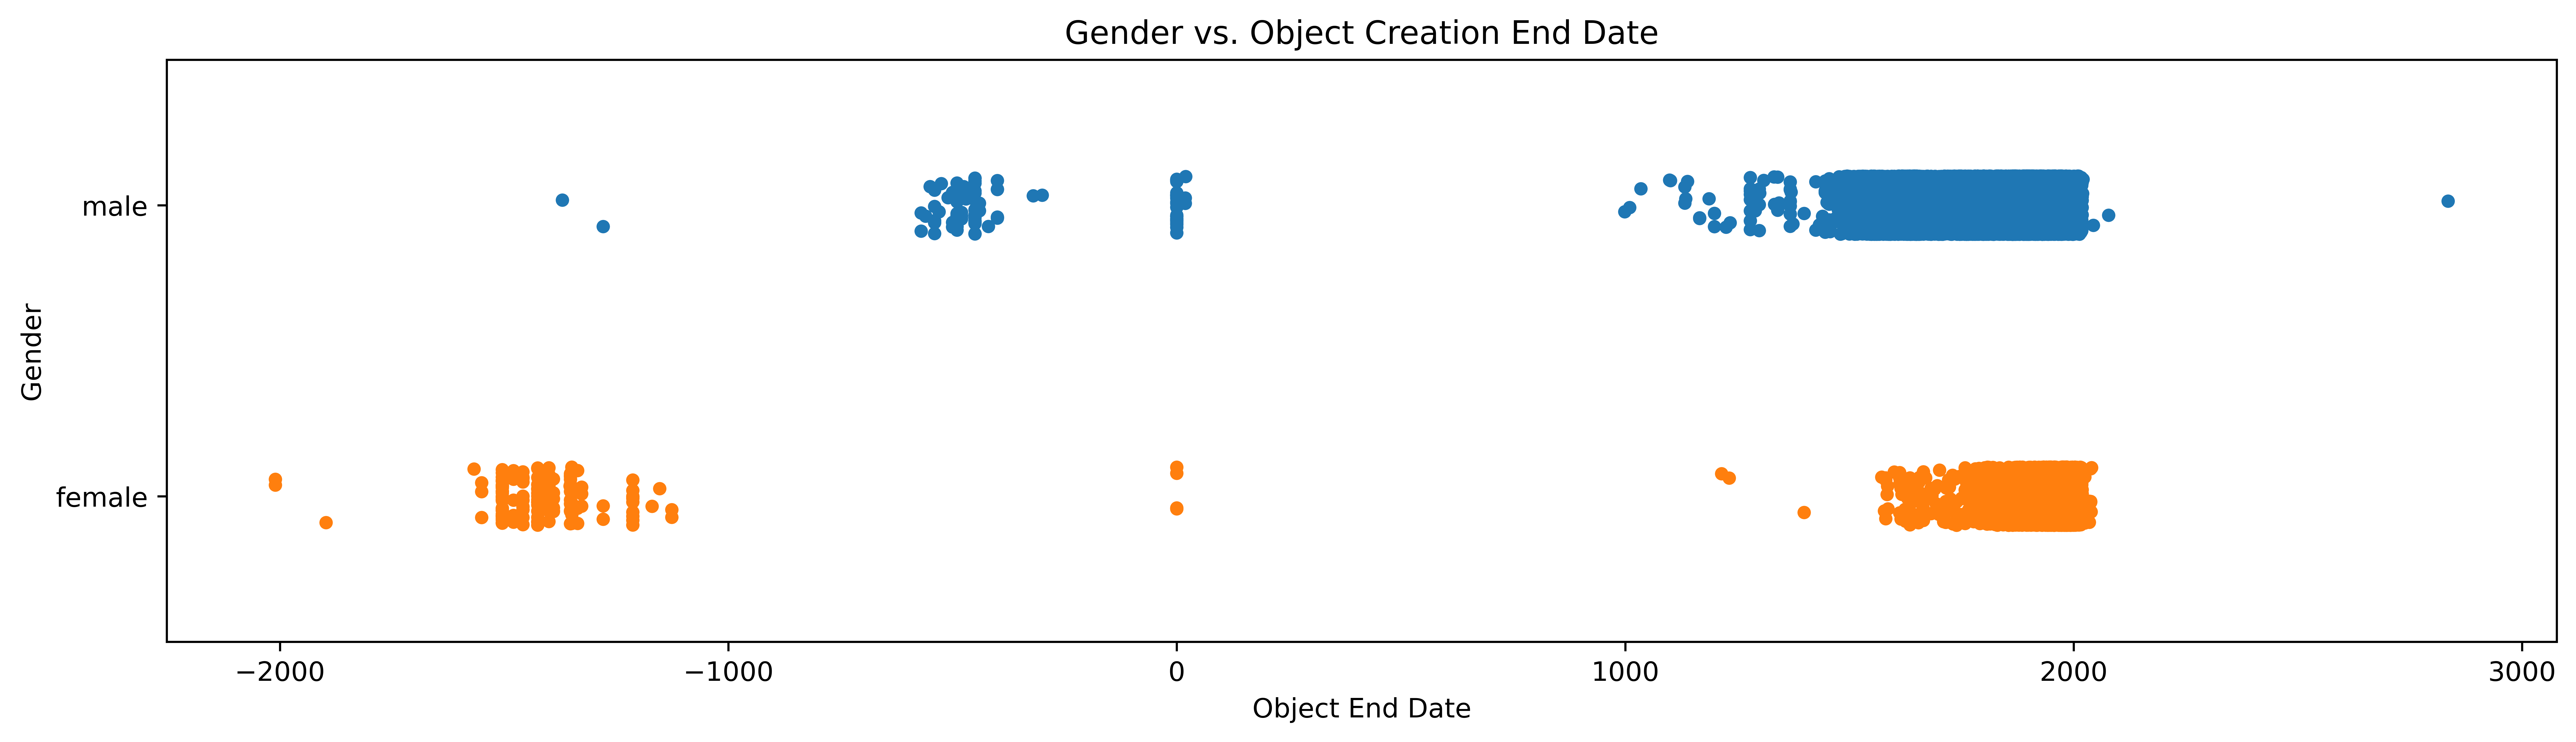

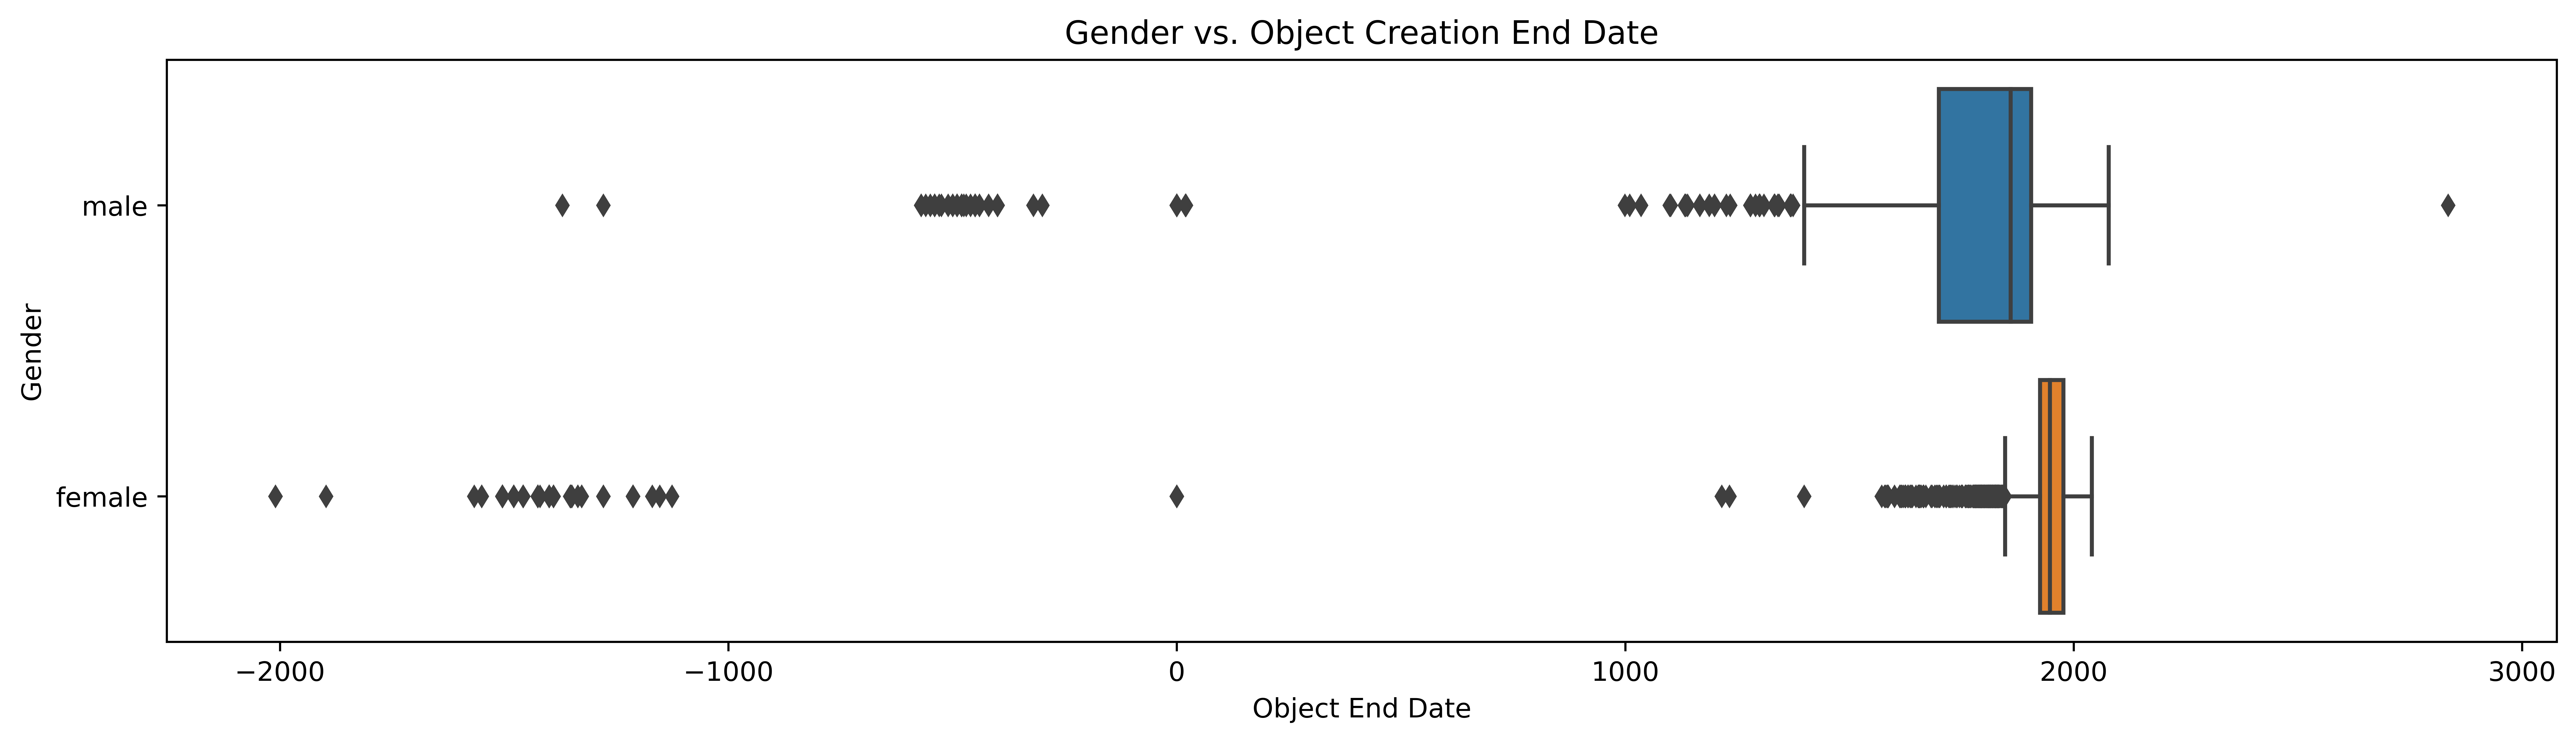

In [65]:
single_gender = genders[(genders["Gender"] == "male") | (genders["Gender"]=="female")]
plt.figure(figsize=(16,4), dpi=800)
sns.stripplot(y="Gender", x="Object End Date", data = single_gender)
plt.title("Gender vs. Object Creation End Date")
plt.show()
single_gender = genders[(genders["Gender"] == "male") | (genders["Gender"]=="female")]
plt.figure(figsize=(16,4), dpi=800)
sns.boxplot(y="Gender", x="Object End Date", data = single_gender)
plt.title("Gender vs. Object Creation End Date")
plt.show()

In [72]:
males = genders[genders["Gender"]=="male"]
females = genders[genders["Gender"] == 'female']
stat , p = stats.ttest_ind(males["Object End Date"], females["Object End Date"], equal_var = False)
print("Test stat:",stat,"\np-value:",p)

Test stat: -17.362424271347322 
p-value: 1.9583464219053034e-66


There is a statisically significant difference between the mean year that male's works were produced vs. females.

# Continental Diversity
For the sake of processing the data, we will only consider works created by one artist.

<ipython-input-74-b1d82757558b>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_artist['CODE']=alpha3code(one_artist.nat)


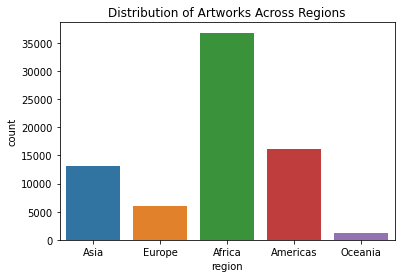

In [74]:
#Filter for only single artists
def get_single_artists(country:str):
    if not country:
        return None
    if "|" in str(country):
        return None
    else:
        return str(country).strip()
df['nat'] = df["Country"].apply(get_single_artists)
one_artist = df[(df.nat != "nan")&(df.nat.notnull())]
# from https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b 
# generate country code  based on country name 
import pycountry
def alpha3code(column):
    CODE=[]
    for country in column:
        if country.count(", ")>1:
            country = country.split(", ")[0]
        elif "or" in country.split(" "):
            country = country.split(" or ")[0]
        elif "probably" in country.split(" ") and len(country.split("probably ")) >1:
            country = country.split("probably ")[1]
        elif "possibly" in country.split(" ") and len(country.split("possibly ")) >1:
            country = country.split("possibly ")[1]
        elif "present-day" in country.split(" ") and len(country.split("present-day ")) >1:
            country = country.split("present-day ")[1]
        elif "?" in country:
            country = country[:-1].strip()
        try:
            code=pycountry.countries.get(name=country.strip()).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            # added this myself
            if country == "England" or country == "Scotland":
                code=pycountry.countries.get(name="United Kingdom").alpha_3
                CODE.append(code)
            elif country == "Iran":
                code=pycountry.countries.get(name="Iran, Islamic Republic of").alpha_3
                CODE.append(code)
            elif country == "U.S.A." or country == "America":
                code=pycountry.countries.get(name="United States").alpha_3 
                CODE.append(code)
            elif country == "Czech Republic":
                code=pycountry.countries.get(name='Czechia').alpha_3
                CODE.append(code)
            elif country == "Holland":
                code=pycountry.countries.get(name='Netherlands').alpha_3
                CODE.append(code)
            elif country == "Russia":
                code=pycountry.countries.get(name='Russian Federation').alpha_3
                CODE.append(code)
            elif country == "Democratic Republic of Congo" or country=="Democratic Republic of the Congo":
                code=pycountry.countries.get(name="Congo").alpha_3
                CODE.append(code)
            elif country == "Byzantine Egypt" or country == "Egypt and Sudan" or country == "Egypt possibly":
                code=pycountry.countries.get(name="Egypt").alpha_3
                CODE.append(code)
            elif country == "Syria":
                code=pycountry.countries.get(name="Syrian Arab Republic").alpha_3
                CODE.append(code)
            elif "France" in country:
                code=pycountry.countries.get(name="France").alpha_3
                CODE.append(code)
            elif country == "Bolivia":
                code=pycountry.countries.get(name="Bolivia, Plurinational State of").alpha_3
                CODE.append(code)
            elif "Uzbekistan" in country:
                code=pycountry.countries.get(name="Uzbekistan").alpha_3
                CODE.append(code)
            elif country == "Republic of Benin":
                code=pycountry.countries.get(name="Benin").alpha_3
                CODE.append(code)
            elif country == "Palestine":
                code=pycountry.countries.get(name="Palestine, State of").alpha_3
                CODE.append(code)
            elif country == "Nubia (Sudan)":
                code=pycountry.countries.get(name="Sudan").alpha_3
                CODE.append(code)
            elif country == "Myanmar (formerly Burma)":
                code=pycountry.countries.get(name="Myanmar").alpha_3
                CODE.append(code)
            elif country == "Korea":
                code=pycountry.countries.get(name="Korea, Democratic People's Republic of").alpha_3
                CODE.append(code)
            else:
                CODE.append('None')
    return CODE
# create a column for code 
one_artist['CODE']=alpha3code(one_artist.nat)

#https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
countries = pd.read_csv("countries.csv")
countries["CODE"] = countries['alpha-3']
df1 = pd.merge(countries.loc[:, ["CODE","name","region"]], one_artist)

sns.countplot(x = "region", data = df1)
plt.title("Distribution of Artworks Across Regions")
plt.show()

As you can see, there are more African works than anything else. This is likely explained by the Museum's massive Egyptian Art department, as shown below. Asia and Africa are both surprisingly high, reflecting a non-Eurocentric view in the collection.

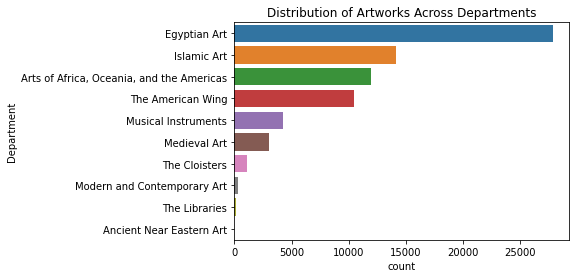

In [77]:
sns.countplot(y= "Department", data = df1,order = df1.Department.value_counts().index)
plt.title("Distribution of Artworks Across Departments")
plt.show()

# Types of Creators

Now, we will investigate the distributions of types of creators, as categorized by the Met.

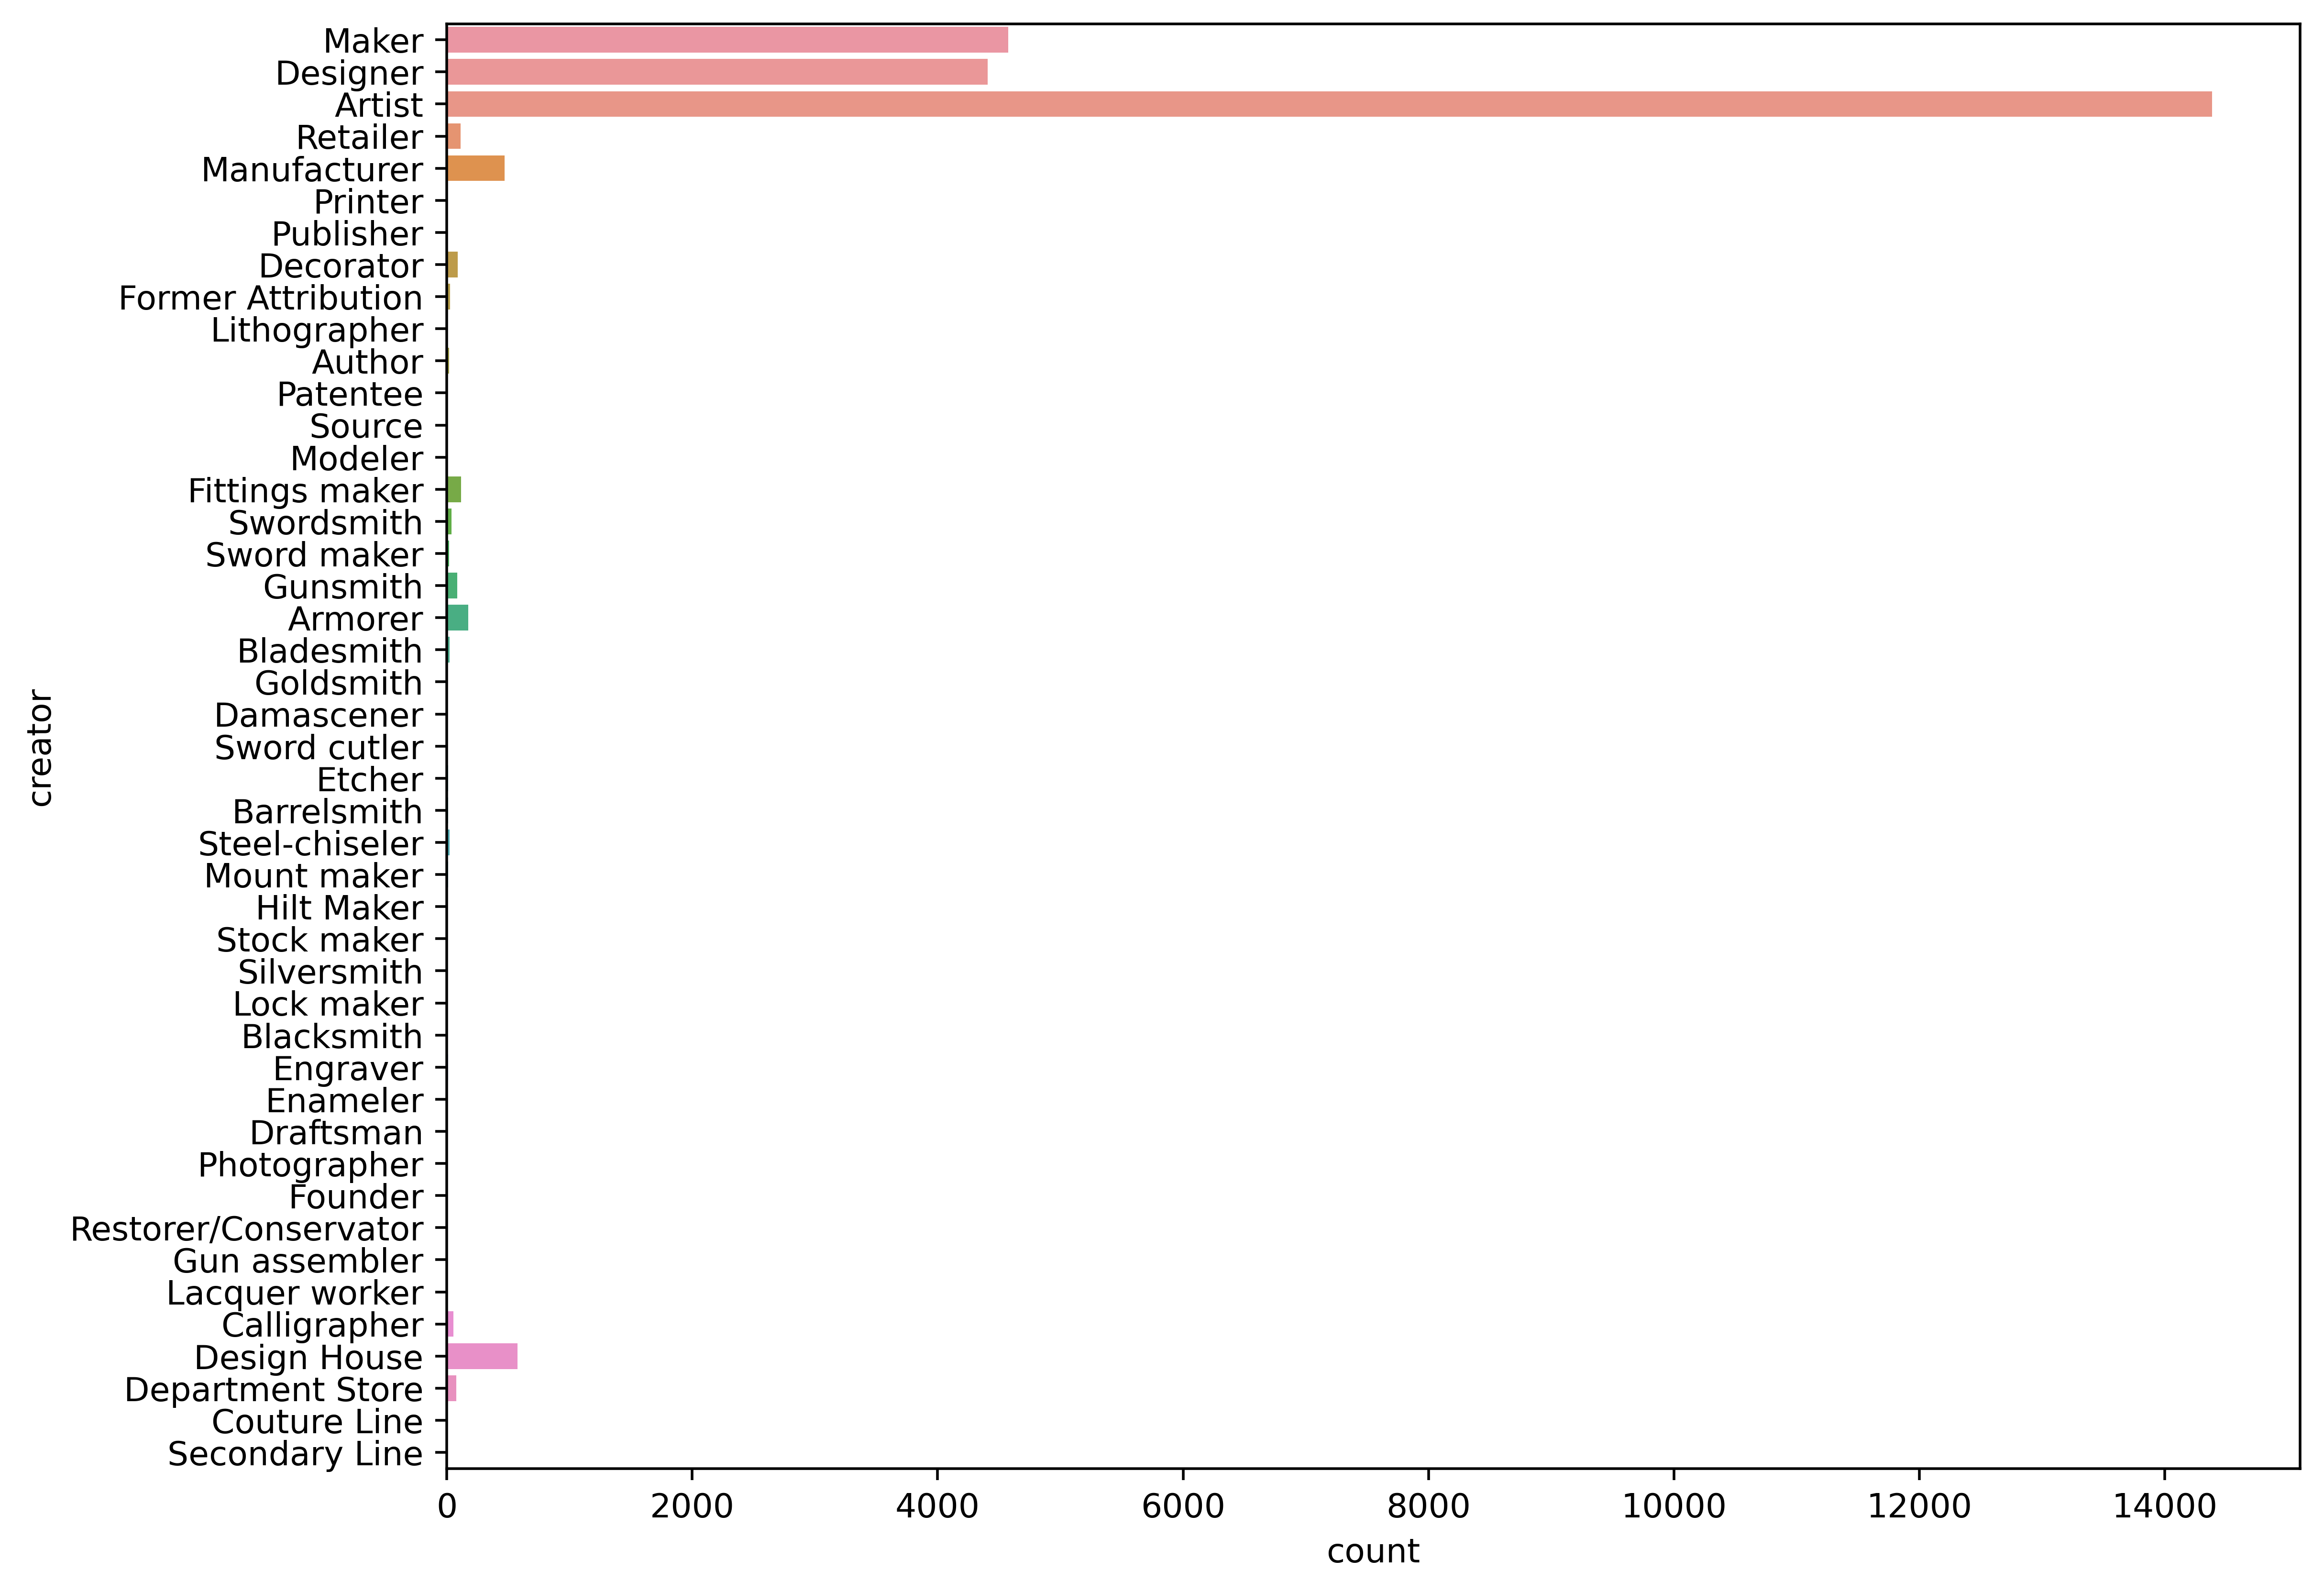

In [79]:
def process_makers(creator: str) -> str:
    return str(creator).split("|")[0]

df1['creator'] = df["Artist Role"].apply(process_makers)
creators = df1[df1['creator']!= "nan"]

plt.figure(figsize=(10,8), dpi=500)
sns.countplot(y = 'creator',data=creators)
plt.show()

As we can see, there are many more artists than there are any other type of creator overall. We will categorize them into two categories for our purposes: "artist" and "non-artist."

<ipython-input-80-2331ff995d16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creators['artist'] = creators["creator"].apply(artistornot)


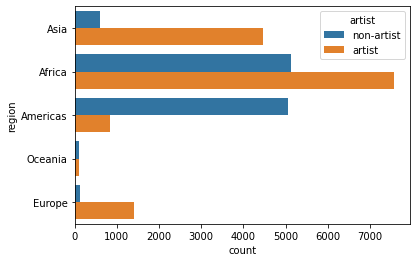

In [80]:
def artistornot(creator: str) -> str:
    if creator == 'Artist':
        return "artist"
    return 'non-artist'
creators['artist'] = creators["creator"].apply(artistornot)

sns.countplot(y = 'region', hue = 'artist', data = creators)
plt.show()

In [97]:
table = pd.pivot_table(creators, values=["Object Number"],
                       index=["region"], columns=["artist"], 
                       aggfunc=len, margins=True, 
                       dropna=True, fill_value=0)
table2 = table.div( table.iloc[:,-1], axis=0 )
test, p = stats.chisquare(f_obs=table2)
print("Test stat:",stat,"\np-value:",p)

Test stat: -17.362424271347322 
p-value: [0.98493032 0.96215907 1.        ]


We cannot reject the null hypothesis that all categories are equal, so we cannot say for sure that there is a differing percentage of artists and makers in each category.

# Conclusions

While we do not know what was actually on display back in 1989 (vs. sitting in a storage room somewhere), the gender diversity numbers of the overall collection were much higher than the 5% cited by the Guerilla Girls. In some ways, the fact that so much female-created art was sitting in storage while only 5% female works were on display just might be worse than the Met not owning that art at all. It would be interesting to see data on what's been on display at the Met since this data represents the entire collection.

While there was a clear gender disparity, the museum's collection features many works created outside of Europe in the Americas. By statistical test, there were not significantly higher proportions of "makers" vs. "artist" labels in those areas as well. It seems as though international art, no matter where it comes from, is respected and collected by the museum.

### Works Referenced
"About the Met." *The Met*, The Metropolitan Museum of Art, 2021. https://www.metmuseum.org/about-the-met. Accessed 30 Apr. 2021.

Gu, Monica. "Why don't we appreciate non-Western art?". *Columbia Spectator*, Spectator Publishing Company, 10 Sept. 2017. https://www.columbiaspectator.com/opinion/2017/09/11/why-dont-we-appreciate-non-western-art/. Accessed 30 Apr. 2021.

Guerilla Girls. *Do Women Have to Be Naked to Get Into the Met. Museum?*. 1989, screenprint on paper, Tate, London. *Tate*, https://www.tate.org.uk/art/artworks/guerrilla-girls-do-women-have-to-be-naked-to-get-into-the-met-museum-p78793. Accessed 30 Apr. 2021. 

Stiernberg, Bonnie. "Yale Faces Backlash After Diversifying Its Art History Curriculum." *InsideHook*, 30 Jan. 2020. https://www.insidehook.com/daily_brief/art/yale-faces-backlash-after-diversifying-its-art-history-curriculum. Accessed 30 Apr. 2021.